In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
folder_name = '20250707_chpc_p2'
d1 = '/home/u0890475/Documents/SW_analysis/' +folder_name+'/'
#d1 = '/home/u0890475/Documents/SW_analysis/20250615_p40_v8_c625-4_dp12_wbcn/'
header = 'plt_'

folder_direction =''
import argparse

In [157]:
def read_file_velocity(fname):
    df = pd.read_csv(fname,header=0)
    sz1,sz2 = df.shape
    speed_list = []
    for i in range(sz1):
        xv,yv,zv = df['x_velocity'][i],df['y_velocity'][i],df['z_velocity'][i]
        speed_list.append(round(math.sqrt(xv**2 + yv**2 + zv**2),4))
        
    time = df['Time'][0]
    return time,speed_list


def read_file_get_dudy(fname,dc='x'):
    df = pd.read_csv(fname,header=0)
    sz1,sz2 = df.shape
    speed_list = []
    for i in range(sz1):
        xv,yv,zv = df['x_velocity'][i],df['y_velocity'][i],df['z_velocity'][i]
        speed_list.append(round(math.sqrt(xv**2 + yv**2 + zv**2),4))
        
    time = df['Time'][0]
    dudy_list =[]
    """
    if (dc not in {'x','y','z'}):        
        return -1
    """
    locs = sorted(set(df['Points:2']))[:2]
    dy = abs(locs[1]-locs[0])
    df['vel'] = speed_list
    df_n = df[df['Points:2'].isin(locs)]
    df_n = df_n.reset_index(drop=True)
    df_n = df_n[['Points:0', 'Points:1', 'Points:2','vel']]
    df_n = df_n.sort_values(by=['Points:1','Points:2'],ascending=[True, True]).reset_index(drop=True)
    num_dict = {}
    for i in range(df_n.shape[0]):
        temp_str = str(df_n.iloc[i,0]) + str(df_n.iloc[i,1]) 
        if temp_str not in num_dict.keys():
            num_dict[temp_str] = [[df_n.iloc[i,2],df_n.iloc[i,3] ] ]
        else:
            num_dict[temp_str].append([df_n.iloc[i,2],df_n.iloc[i,3] ])
    
        
    for k,v in num_dict.items():
        if len(v)%2!=0:
            
            continue
        if len(v)==2:
            du = v[0][1] - v[1][1] if v[0][0]> v[1][0] else v[1][1] - v[0][1]
        else:
            vel_list = [i[1] for i in v ]
            du = max(vel_list) - min(vel_list)
        
        dudy = round(du/dy,5)
        
        dudy_list.append(dudy)  
    
    return time,dudy_list


def get_all_dudy_wall(d1):
    all_data = []
    timeline = []
    mean_v = []
    sort_file = []
    #file_count = len([f for f in os.listdir(d1) if os.path.isfile(os.path.join(d1, f))])
    l1 = [f for f in os.listdir(d1) if os.path.isfile(os.path.join(d1, f))]
    file_count = len(l1)
    for i in range(file_count):
        seq_num = l1[i].split('_')[1].split('.')[0]
        sort_file.append([int(seq_num),l1[i]])
        
    sorted_f = sorted(sort_file, key=lambda x: x[0])
    
    
    for i in range(file_count):
        #file_name = d1+'/'+header+str(i)+'.csv'
        #print(d1+'/'+sorted_f[i][1])
        ttime,vlist = read_file_get_dudy(d1+'/'+sorted_f[i][1])

        if len(vlist)<1:
            print('Dataset of '+sorted_f[i][1]+' cant be processed, check again!')
        timeline.append(ttime)
        all_data.append(vlist)
        mean_v.append(np.median(vlist))
        
    return timeline,mean_v


#fig, ax = plt.subplots()

def init():
    ax.clear()
    ax.set_title("Histogram with Mean")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

def update(frame,dataframes):
    ax.clear()
    df = dataframes[frame]
    values = df  # 替换成你实际的列名
    mean_val = values.mean()

    # 绘制直方图
    ax.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

    ax.set_title(f"Frame {frame+1} | Mean = {mean_val:.2f}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    
def get_data(d1):
    all_data = []
    timeline = []
    mean_v = []
    sort_file = []
    #file_count = len([f for f in os.listdir(d1) if os.path.isfile(os.path.join(d1, f))])
    l1 = [f for f in os.listdir(d1) if os.path.isfile(os.path.join(d1, f))]
    file_count = len(l1)
    for i in range(file_count):
        seq_num = l1[i].split('_')[1].split('.')[0]
        sort_file.append([int(seq_num),l1[i]])
        
    sorted_f = sorted(sort_file, key=lambda x: x[0])
        
        
    for i in range(file_count):
        #file_name = d1+'/'+header+str(i)+'.csv'
        ttime,vlist = read_file_all(d1+'/'+sorted_f[i][1])
        timeline.append(ttime)
        all_data.append(vlist)
        mean_v.append(np.mean(vlist))
        #mean_v.append(np.mean(vlist))
        
    return timeline,mean_v

def get_v_distribution(d1,bins_num =25):
    import matplotlib.pyplot as plt
    sort_file = []
    lo1 = [f for f in os.listdir(d1) if os.path.isfile(os.path.join(d1, f))]
    file_count = len(lo1)
    for i in range(file_count):
        seq_num = lo1[i].split('_')[1].split('.')[0]
        sort_file.append([int(seq_num),lo1[i]])
        
    l1 = sorted(sort_file, key=lambda x: x[0])
    
    vel_centr_all = []
    vel_count_all = []
    label_all = []
    timestep_float = []
    for i in range(file_count):
        tt1,tv1 = read_file_velocity(d1+'/'+l1[i][1])
        label_all.append(f'T={tt1}')
        t_counts,t_edges,_ = plt.hist(tv1,bins=bins_num,range=(0,12.5))
        timestep_float.append(tt1)
        t_bin_center = [(t_edges[x+1]-t_edges[x])/2+t_edges[x] for x in range(len(t_edges)-1)]
        vel_centr_all.append(t_bin_center)
        vel_count_all.append(np.array(t_counts))
        #plt.plot(t_bin_center,t_counts,'-',label=t_label)
    plt.show()
    return vel_centr_all,vel_count_all,timestep_float


def plot_v_distribution(vel_centr_all,vel_count_all,timestep_float):
    plt.figure(figsize=(30,24))
    file_count = len(vel_centr_all)
    label_all =  [str(timestep_float[i]) for i in range(len(timestep_float))]
    for j in range(file_count):
        #print(j)
        plt.plot(vel_centr_all[j], vel_count_all[j],'.',label=label_all[j])
        for k in range(4):
            plt.text(vel_centr_all[j][k+18], vel_count_all[j][k+18],f'{round(timestep_float[j],5)}',fontsize=3,ha="left", va="bottom")
        #plt.annotate(vel_centr_all[j][18:22],vel_count_all[j][18:22],f'{timestep_float[j]}',fontsize=5)
    plt.legend(loc='center left',bbox_to_anchor=(-0.2, 0.5))
    plt.xlabel('velocity m/s')
    plt.ylabel('counts')
    plt.savefig('Velocity distribution',dpi=1200)
    plt.show()
        
    
    

In [143]:
#c,v,t= get_v_distribution('/home/u0890475/Documents/SW_analysis/20250909_p38_v10_incomp_peridc')
#plot_v_distribution(c,v,t)
[str(i) for i in t] 

['0.037001',
 '0.037501',
 '0.038',
 '0.038501',
 '0.039',
 '0.039501',
 '0.040001',
 '0.040501',
 '0.041001',
 '0.041501',
 '0.042001',
 '0.042501',
 '0.043001',
 '0.0435',
 '0.044001',
 '0.0445',
 '0.045001',
 '0.045501',
 '0.046',
 '0.046501',
 '0.047001',
 '0.047501']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


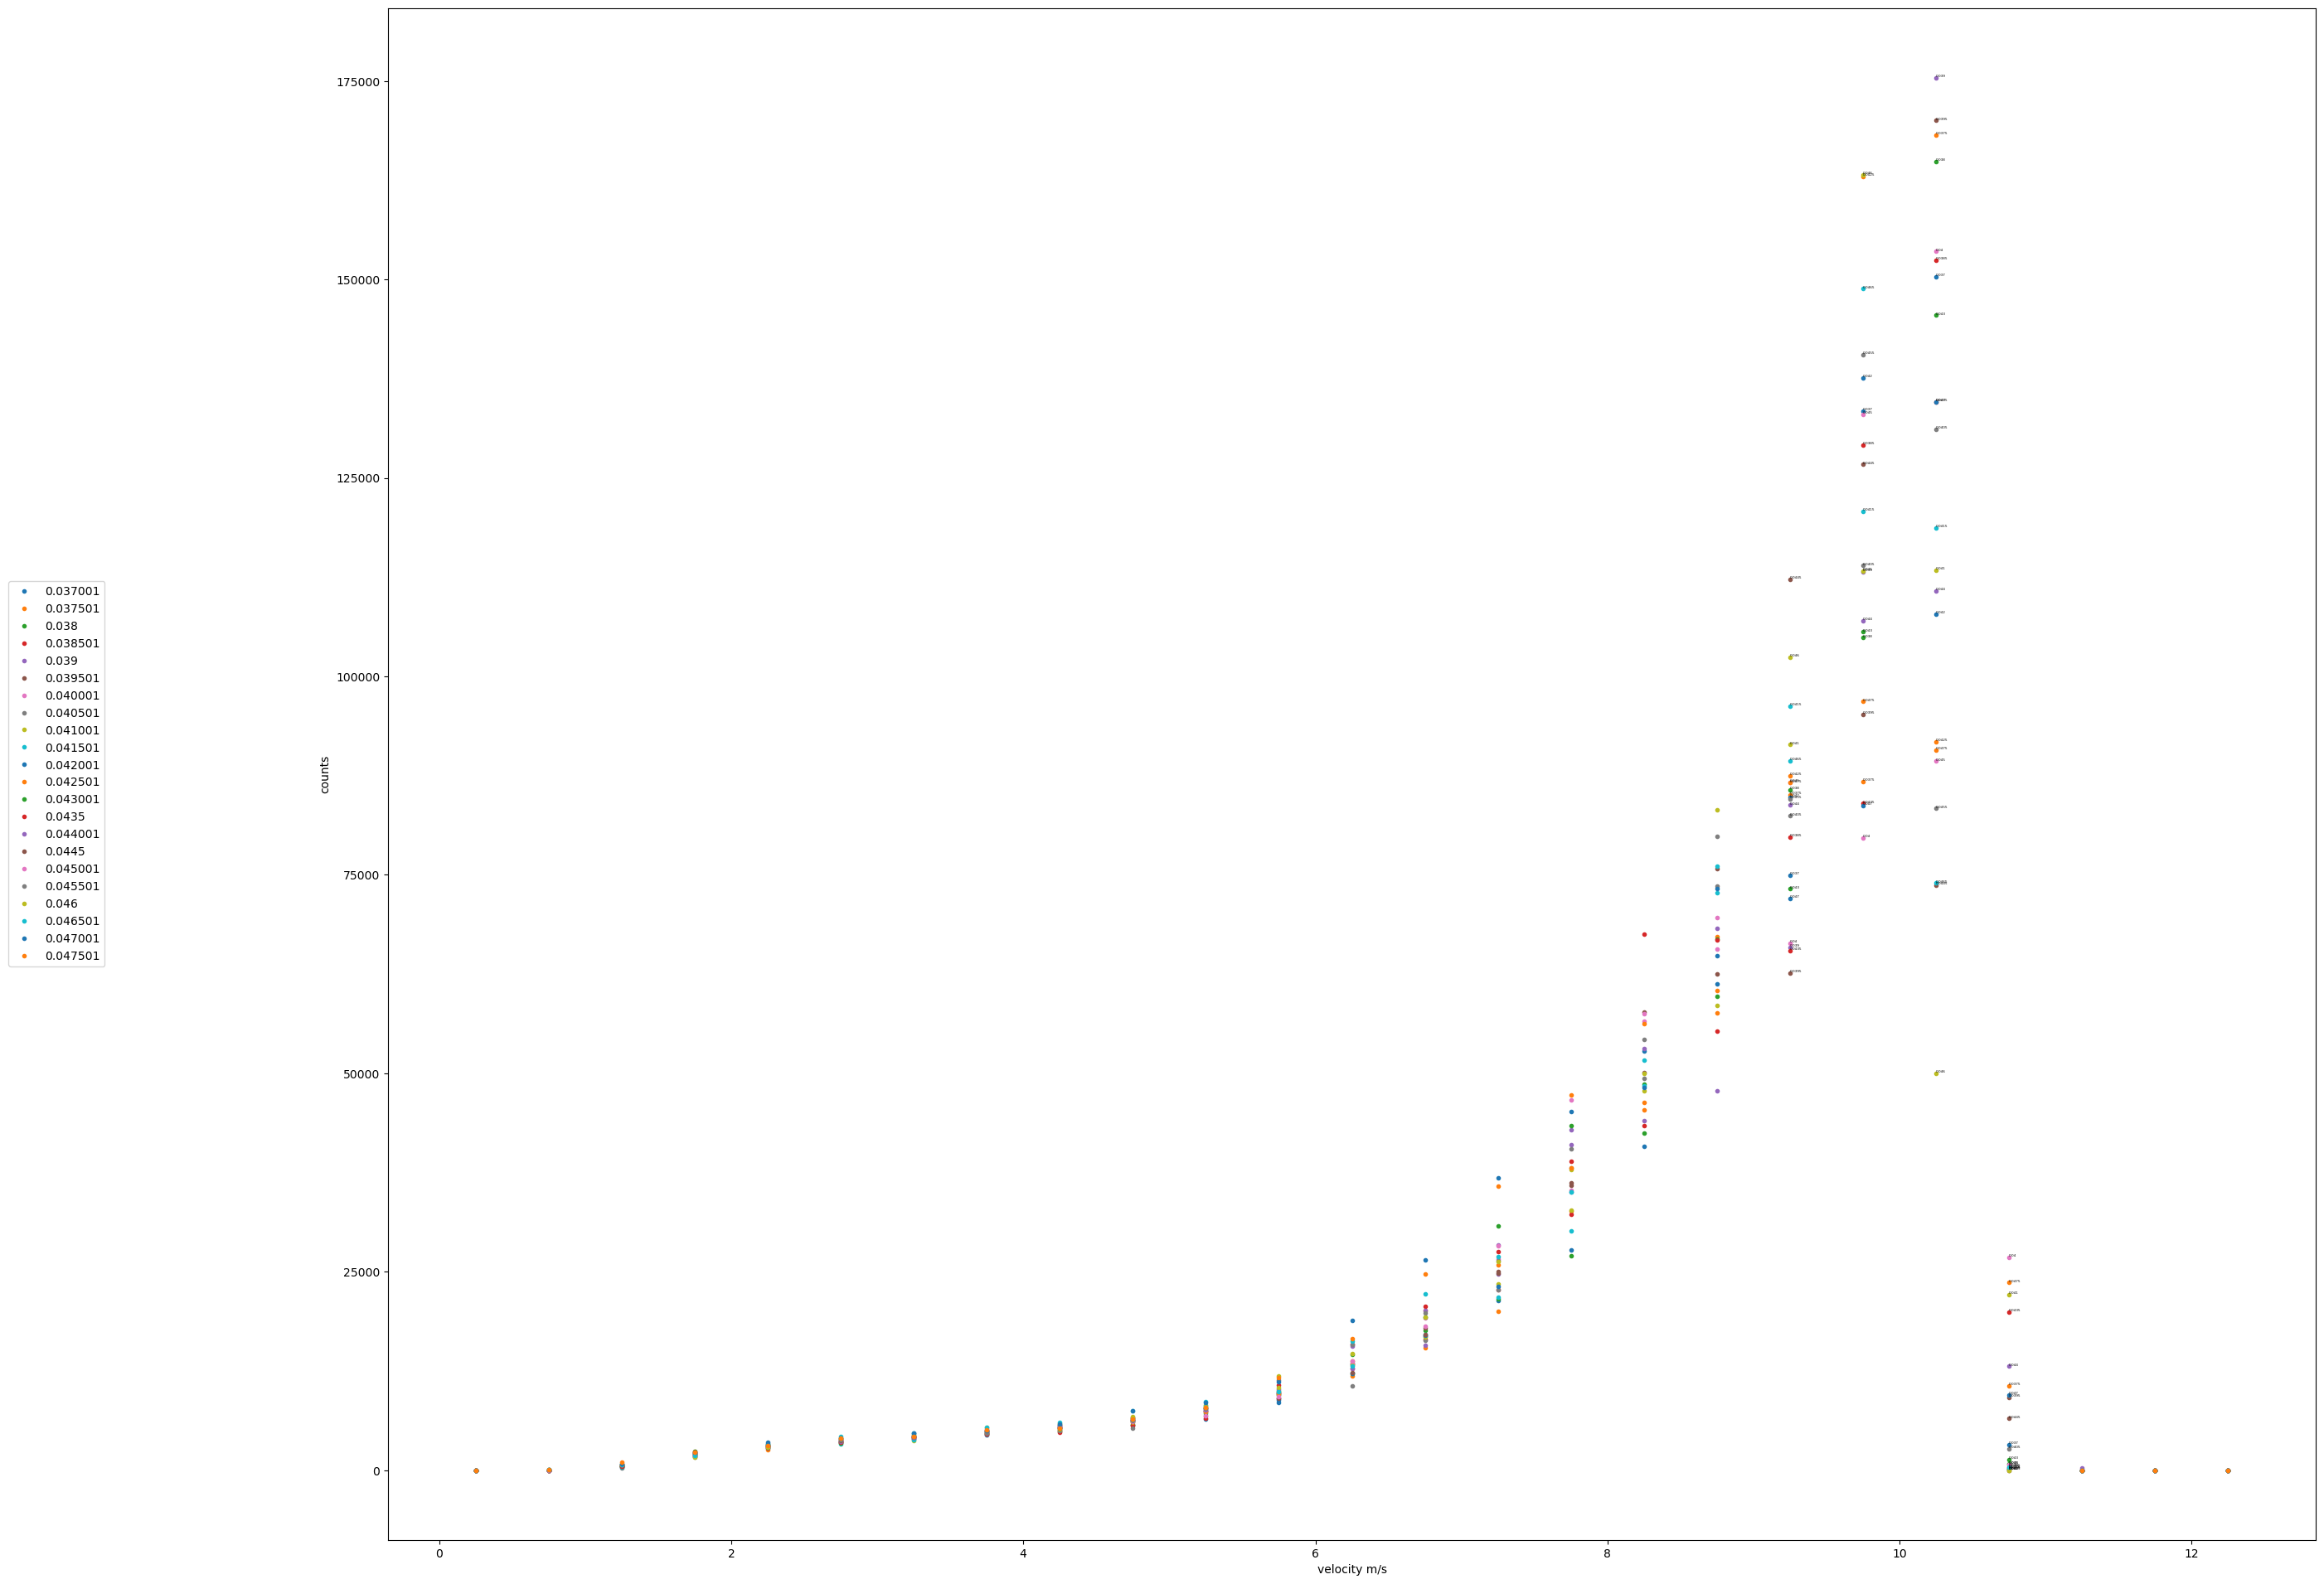

In [159]:
plot_v_distribution(c,v,t)

In [153]:
pwd

'/home/u0890475/Documents/SW_analysis'

In [23]:
center = [ (bin_edge[i+1]-bin_edge[i])/2+bin_edge[i] for i in range(0,len(bin_edge)-1)]

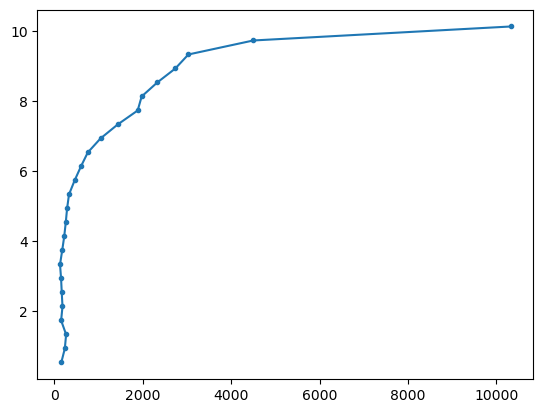

In [31]:
plt.plot(cts,center,'.-')

In [ ]:
for i in range()